Our goal is to create a model that categorizes the flowers given the attributes: sepal.length, sepal.width, petal.length and petal.width. We will use the K-Nearest Neighbors Algorithm (KNN).

In [ ]:
!pip install pandas
!pip install matplotlib
!pip install numpy
!pip install scikit-learn
!pip install scipy
!pip install seaborn

ERROR: Operation cancelled by user


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn import preprocessing
%matplotlib inline

Get the dataset

In [ ]:
!wget https://gist.githubusercontent.com/netj/8836201/raw/6f9306ad21398ea43cba4f7d537619d0e07d5ae3/iris.csv

--2024-01-03 16:28:14--  https://gist.githubusercontent.com/netj/8836201/raw/6f9306ad21398ea43cba4f7d537619d0e07d5ae3/iris.csv
Resolving gist.githubusercontent.com (gist.githubusercontent.com)... 185.199.111.133, 185.199.109.133, 185.199.110.133, ...
Connecting to gist.githubusercontent.com (gist.githubusercontent.com)|185.199.111.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 3975 (3.9K) [text/plain]
Saving to: ‘iris.csv’

iris.csv            100%[===================>]   3.88K  --.-KB/s    in 0s      

2024-01-03 16:28:14 (51.2 MB/s) - ‘iris.csv’ saved [3975/3975]



# Preview the data
*   There are 150 observations with 4 features each
*   There are 50 observations for each variety


In [ ]:
df = pd.read_csv("iris.csv")

df.head() # the first 5 rows

,sepal.length,sepal.width,petal.length,petal.width,variety
0,5.1,3.5,1.4,0.2,Setosa
1,4.9,3.0,1.4,0.2,Setosa
2,4.7,3.2,1.3,0.2,Setosa
3,4.6,3.1,1.5,0.2,Setosa
4,5.0,3.6,1.4,0.2,Setosa


In [ ]:
df.describe() # summarize the data

,sepal.length,sepal.width,petal.length,petal.width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333
std,0.828066,0.435866,1.765298,0.762238
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [ ]:
df['variety'].value_counts() # displays the amount of observations for each variety

Setosa        50
Versicolor    50
Virginica     50
Name: variety, dtype: int64

# Data Visualization
We see that the relantionship between pairs of features of setosa is distincly different from the other two species. We also observer that there is some overlap of the other two species (Versicolor and Virginica)




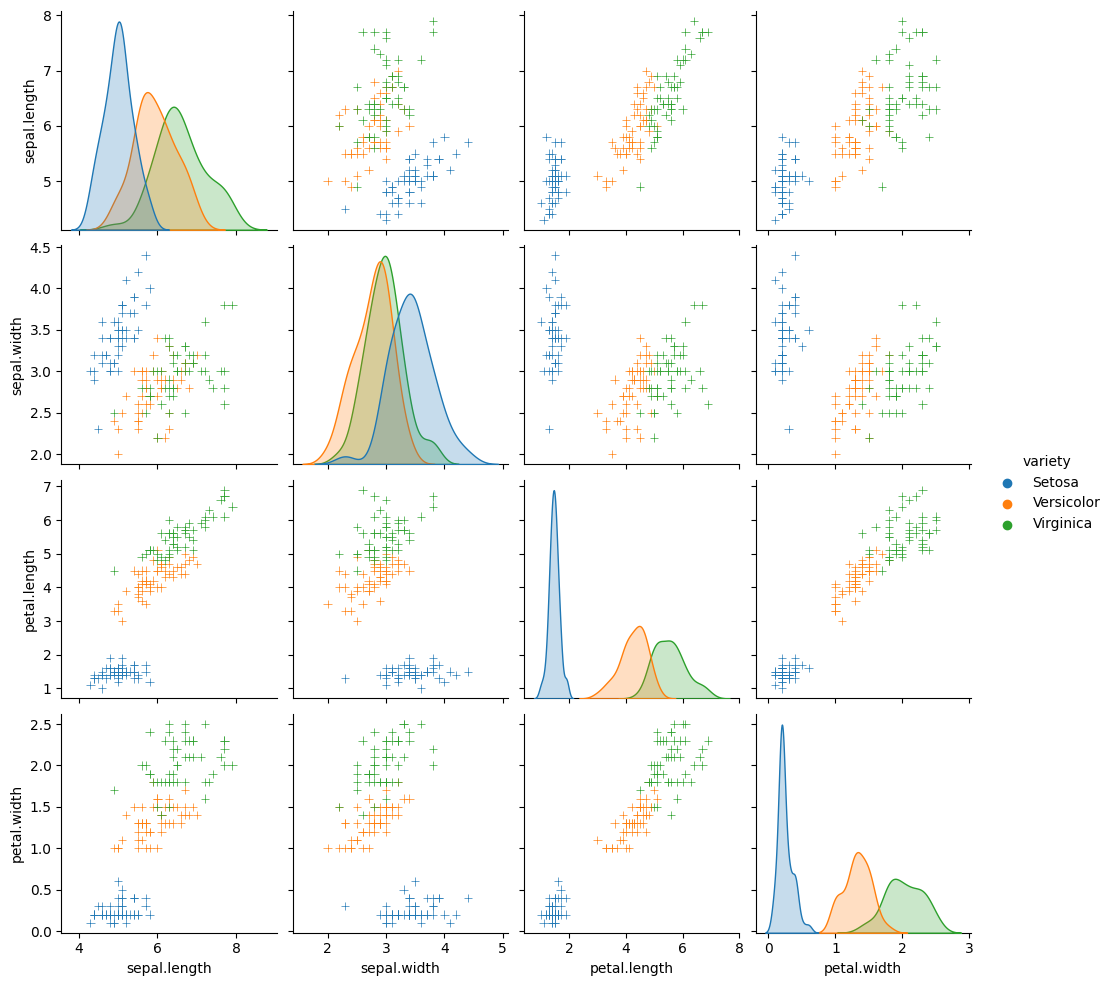

In [ ]:
tmp = df.drop(index=1)
g = sns.pairplot(tmp, hue='variety', markers='+')
plt.show()

In [ ]:
df.columns

Index(['sepal.length', 'sepal.width', 'petal.length', 'petal.width',
       'variety'],
      dtype='object')

Creating the X and y arrays:

In [ ]:
X = df[['sepal.length', 'sepal.width', 'petal.length', 'petal.width']].values
X[0:5]

array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2],
       [4.6, 3.1, 1.5, 0.2],
       [5. , 3.6, 1.4, 0.2]])

For y we transform the categorical labes ('Setosa', 'Versicolor', 'Virginica') into numerical representations (integer values).

In [ ]:
from sklearn.preprocessing import LabelEncoder

y = df[['variety']].values.ravel() # Flatten to a 1D array
label_encoder = LabelEncoder()
y = label_encoder.fit_transform(y)
print(y)

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2]


We split the dataset into train/test set

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=4)
print('Train set:', X_train.shape, y_train.shape)
print('Test set:', X_test.shape, y_test.shape)

Train set: (120, 4) (120,)
Test set: (30, 4) (30,)


Normalize Data

In [ ]:
X_train_norm = preprocessing.StandardScaler().fit(X_train).transform(X_train.astype(float))
X_train_norm[0:5]

array([[-0.59919456, -0.12779977,  0.36033386,  0.31743078],
       [-1.57913797,  0.35144936, -1.47337606, -1.43236433],
       [ 0.99321348, -1.32592258,  1.12930899,  0.72122965],
       [-1.2116592 , -0.12779977, -1.47337606, -1.43236433],
       [-1.08916627, -1.80517171, -0.34948934, -0.35556734]])

Let’s just train for a random number, let’s take k = 4.

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
k = 4

#Train Model and Predict
neigh = KNeighborsClassifier(n_neighbors = k).fit(X_train_norm,y_train)
neigh

KNeighborsClassifier(n_neighbors=4)

In [ ]:
X_test_norm = preprocessing.StandardScaler().fit(X_test).transform(X_test.astype(float))
X_test_norm[0:5]

array([[ 0.88590466, -0.55039755,  1.23506922,  1.50543592],
       [ 0.04788674,  1.46325203, -0.79446869, -0.83058533],
       [ 2.08307311, -0.55039755,  1.49526639,  1.245878  ],
       [ 2.3225068 , -0.14766764,  1.75546356,  1.50543592],
       [ 1.96335626, -0.34903259,  1.59934526,  1.11609904]])

In [ ]:
yhat = neigh.predict(X_test_norm)
yhat[0:5]

array([2, 0, 2, 2, 2])

In [ ]:
from sklearn import metrics
print("Train set Accuracy: ", metrics.accuracy_score(y_train, neigh.predict(X_train_norm)))
print("Test set Accuracy: ", metrics.accuracy_score(y_test, yhat))

Train set Accuracy:  0.375
Test set Accuracy:  0.16666666666666666


Let’s train for all the possible Ks (we have a small dataset so we afford to do it, on larger datasets this wouldn’t be recommended)

In [ ]:
Ks = 120
mean_acc = np.zeros((Ks-1))
std_acc = np.zeros((Ks-1))

for n in range(1,Ks):

    #Train Model and Predict
    neigh = KNeighborsClassifier(n_neighbors = n).fit(X_train_norm,y_train)
    yhat=neigh.predict(X_test_norm)
    mean_acc[n-1] = metrics.accuracy_score(y_test, yhat)


    std_acc[n-1]=np.std(yhat==y_test)/np.sqrt(yhat.shape[0])

best_k = np.argmax(mean_acc)
max_accuracy = mean_acc[best_k]
print("The best value for k is k =", best_k+1, "with the test accuracy =",max_accuracy)

The best value for k is k = 58 with the test accuracy = 0.9666666666666667


Plot the model accuracy for a different number of neighbors.

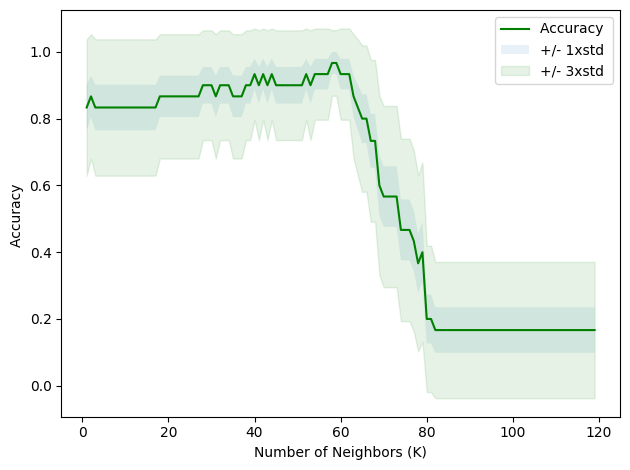

In [ ]:
plt.plot(range(1,Ks),mean_acc,'g')
plt.fill_between(range(1,Ks),mean_acc - 1 * std_acc,mean_acc + 1 * std_acc, alpha=0.10)
plt.fill_between(range(1,Ks),mean_acc - 3 * std_acc,mean_acc + 3 * std_acc, alpha=0.10,color="green")
plt.legend(('Accuracy ', '+/- 1xstd','+/- 3xstd'))
plt.ylabel('Accuracy ')
plt.xlabel('Number of Neighbors (K)')
plt.tight_layout()
plt.show()


Chose 58 to model


In [ ]:
k = 58
#Train Model and Predict
neigh = KNeighborsClassifier(n_neighbors = k).fit(X_train_norm,y_train)
neigh.predict([[6, 3, 4, 2]])

array([2])